In [93]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set(style="darkgrid", rc={'figure.figsize':(30,10)})

#### First, let's read our dataset:

In [29]:
data = pd.read_csv("../Datasets/TV_Campaign.csv",parse_dates=['Date'],dayfirst=True)

data.head()

,Campaign,Date,New Active Passengers,Tours,New User Registrations,App Downloads (Android and iOS)
0,NaN,2015-10-05,2529,20886,3810,3975
1,NaN,2015-10-06,2226,21045,3690,4110
2,NaN,2015-10-07,2355,22455,3927,4188
3,NaN,2015-10-08,2922,24504,5043,5433
4,NaN,2015-10-09,5202,29562,8493,9609


## Now for the questions provided in the Excel File.



### We ran a TV campaign  with the goal of growing our customer base and want to find out about the impact it had on our customer acquisition kpis.

### A. Which measure or measures are most relevant to judge the success of the campaign.								


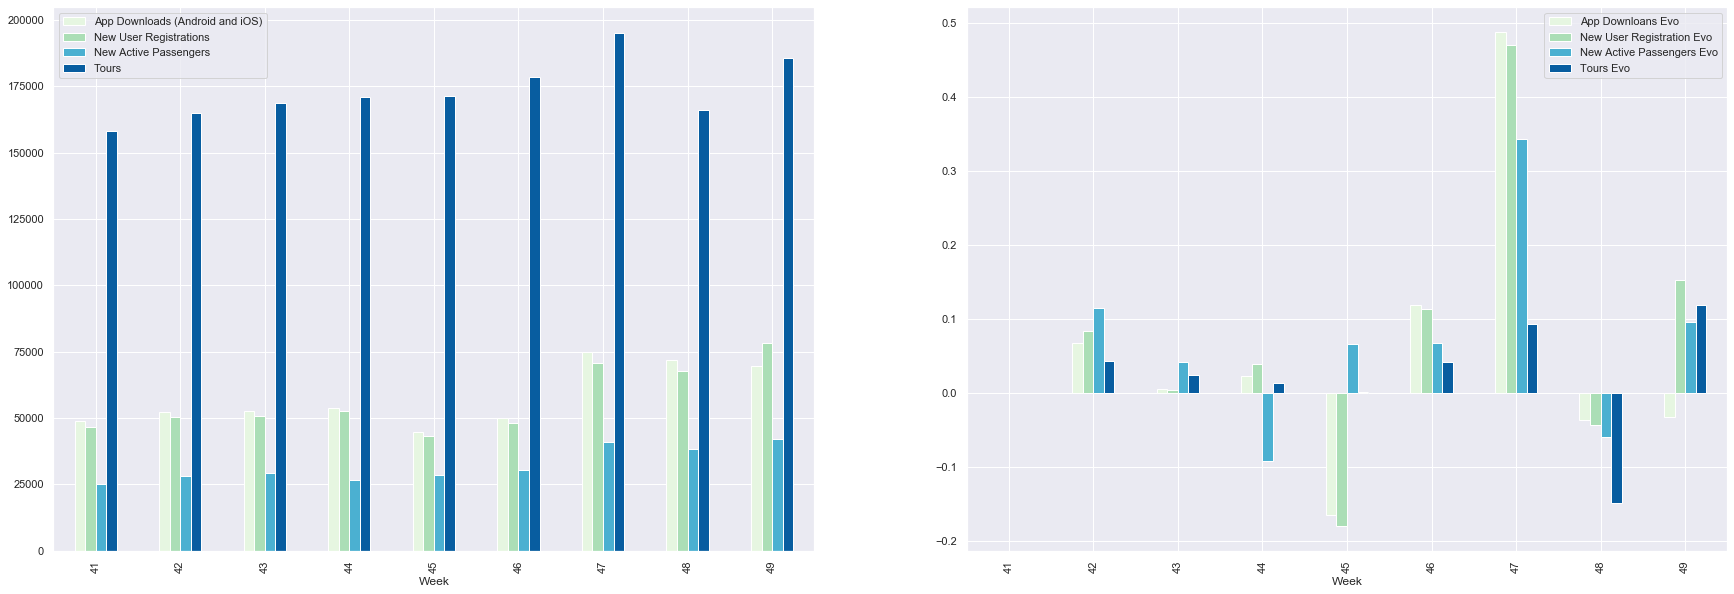

In [96]:
# To answer this question let's first examine the historic evolution of New Active Passengers (NAP) and New User Registrations (NUR) throughout the dataset's timeframe, as well as the NAP Contribution to Tours. 

# 1. Filtering the data.

df = data[['Date', 'New Active Passengers', 'Tours', 'New User Registrations', 'App Downloads (Android and iOS)']]

# 2. Parsing the date as Weeks of the year.

df['Week'] = df['Date'].dt.week

# 3. Study App Downloads, NUR, NAP, and Tours evolution in an WoW manner. 

pivot = pd.DataFrame(
        data=pd.pivot_table(df, 
            values=['New User Registrations', 'New Active Passengers', 'App Downloads (Android and iOS)', 'Tours'],
                index=['Week'],
                    aggfunc={'New User Registrations': np.sum, 'New Active Passengers': np.sum, 'App Downloads (Android and iOS)': np.sum, 'Tours': np.sum}),
                        dtype=np.int64)

pivot = pivot[['App Downloads (Android and iOS)', 'New User Registrations', 'New Active Passengers', 'Tours']]

pivot['App Downloans Evo'] = pivot['App Downloads (Android and iOS)'].div(pivot['App Downloads (Android and iOS)'].shift(1)) - 1

pivot['New User Registration Evo'] = pivot['New User Registrations'].div(pivot['New User Registrations'].shift(1)) - 1

pivot['New Active Passengers Evo'] = pivot['New Active Passengers'].div(pivot['New Active Passengers'].shift(1)) - 1

pivot['Tours Evo'] = pivot['Tours'].div(pivot['Tours'].shift(1)) - 1

pivot.fillna(0)

fig, ax =plt.subplots(1,2)

pivot[['App Downloans Evo', 'New User Registration Evo', 'New Active Passengers Evo', 'Tours Evo']][:9].plot(
    kind='bar',
        colormap=ListedColormap(sns.color_palette("GnBu", 10)),
            ax=ax[1])

pivot[['App Downloads (Android and iOS)', 'New User Registrations', 'New Active Passengers', 'Tours']][:9].plot(
    kind='bar',
        colormap=ListedColormap(sns.color_palette("GnBu", 10)),
            stacked=False, 
                ax=ax[0])
fig.show()


### B. Identify the impact on activity that the TV campaign had while it was running. 								
	

### C. Assuming a total cost of 1 million euro for the campaign, what was the CPA through the campaign.							